#### Activity 3.01

In [160]:
!ls

Activities.ipynb                     combined_cycle_power_plant-Copy1.csv
Exercises-Chapter-3.ipynb            synth_temp-Copy1.csv
austin_weather-Copy1.csv


In [161]:
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
df= pd.read_csv('austin_weather-Copy1.csv')

In [163]:
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [164]:
df = df.loc[:,['Date','TempAvgF']]
df.head()

,Date,TempAvgF
0,2013-12-21,60
1,2013-12-22,48
2,2013-12-23,45
3,2013-12-24,46
4,2013-12-25,50


In [165]:
df.loc[:,'Year'] = df.loc[:,'Date'].str.slice(0,4).astype('int')
df.loc[:,'Month'] = df.loc[:,'Date'].str.slice(5,7).astype('int')
df.loc[:,'Day'] = df.loc[:,'Date'].str.slice(8,10).astype('int')
df = df.loc[df.index <365]
df.head()

,Date,TempAvgF,Year,Month,Day
0,2013-12-21,60,2013,12,21
1,2013-12-22,48,2013,12,22
2,2013-12-23,45,2013,12,23
3,2013-12-24,46,2013,12,24
4,2013-12-25,50,2013,12,25


In [166]:
window = 20
rolling = df.TempAvgF.rolling(window).mean()
rolling.head(25)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19    47.75
20    48.00
21    48.70
22    49.30
23    49.85
24    50.20
Name: TempAvgF, dtype: float64

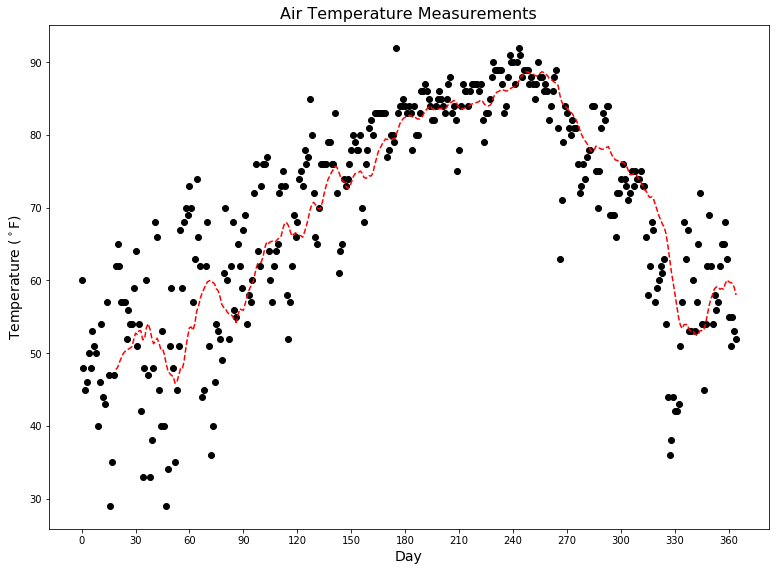

In [167]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([1,1,1,1])
ax.scatter(df.index, df.TempAvgF, c='k', label = 'Raw Data')
ax.plot(rolling.index, rolling,linestyle='--', label=f'{window} day moving average',c='r')
ax.set_xticks(range(df.index.min(),df.index.max(),30))
ax.set_title('Air Temperature Measurements',
             fontsize = 16)
ax.set_xlabel('Day', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$F)', 
              fontsize = 14)
plt.show()

#### Activity 3.02: Linear Regression Using the Least Squares Method



In [168]:
!ls

Activities.ipynb                     combined_cycle_power_plant-Copy1.csv
Exercises-Chapter-3.ipynb            synth_temp-Copy1.csv
austin_weather-Copy1.csv


In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [170]:
df=pd.read_csv('austin_weather-Copy1.csv')

In [171]:
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [173]:
df.isnull().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

In [174]:
df.shape

(1319, 21)

In [175]:
df=df.loc[:,['Date','TempAvgF']]
df.head()

,Date,TempAvgF
0,2013-12-21,60
1,2013-12-22,48
2,2013-12-23,45
3,2013-12-24,46
4,2013-12-25,50


In [176]:
df['Year']= df.Date.str.slice(0,4).astype('int')
df.Year

0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
1314    2017
1315    2017
1316    2017
1317    2017
1318    2017
Name: Year, Length: 1319, dtype: int64

In [177]:
df['Month']=df.Date.str.slice(5,7).astype('int')
df.Month

0       12
1       12
2       12
3       12
4       12
        ..
1314     7
1315     7
1316     7
1317     7
1318     7
Name: Month, Length: 1319, dtype: int64

In [178]:
df['Day']=df.Date.str.slice(8,10).astype('int')
df.Day

0       21
1       22
2       23
3       24
4       25
        ..
1314    27
1315    28
1316    29
1317    30
1318    31
Name: Day, Length: 1319, dtype: int64

In [179]:
df.head()

,Date,TempAvgF,Year,Month,Day
0,2013-12-21,60,2013,12,21
1,2013-12-22,48,2013,12,22
2,2013-12-23,45,2013,12,23
3,2013-12-24,46,2013,12,24
4,2013-12-25,50,2013,12,25


In [180]:
window=20
df['Moving_Avg']= df.TempAvgF.rolling(20).mean()
df.head(25)


,Date,TempAvgF,Year,Month,Day,Moving_Avg
0,2013-12-21,60,2013,12,21,NaN
1,2013-12-22,48,2013,12,22,NaN
2,2013-12-23,45,2013,12,23,NaN
3,2013-12-24,46,2013,12,24,NaN
4,2013-12-25,50,2013,12,25,NaN
5,2013-12-26,48,2013,12,26,NaN
6,2013-12-27,53,2013,12,27,NaN
7,2013-12-28,51,2013,12,28,NaN
8,2013-12-29,50,2013,12,29,NaN
9,2013-12-30,40,2013,12,30,NaN


In [181]:
df.Year.unique()

array([2013, 2014, 2015, 2016, 2017])

In [182]:
df_year=df.loc[df.Year==2015].reset_index()
df_year['day_of_year'] = df_year.index +1
df_year.tail()

,index,Date,TempAvgF,Year,Month,Day,Moving_Avg,day_of_year
360,736,2015-12-27,55,2015,12,27,61.10,361
361,737,2015-12-28,41,2015,12,28,60.20,362
362,738,2015-12-29,43,2015,12,29,59.25,363
363,739,2015-12-30,49,2015,12,30,58.45,364
364,740,2015-12-31,46,2015,12,31,57.45,365


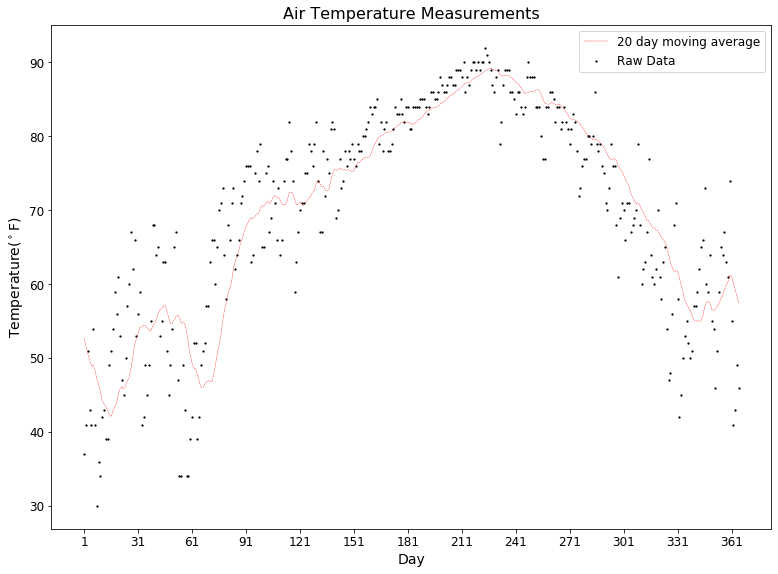

In [183]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([1,1,1,1])
ax.scatter(df_year.day_of_year,df_year.TempAvgF, label='Raw Data',c='k',s=1.5)
ax.plot(df_year.day_of_year, df_year.Moving_Avg, linestyle='--',c='red',linewidth=0.4,label='20 day moving average')
ax.set_title('Air Temperature Measurements',fontsize=16)
ax.set_xlabel('Day',fontsize=14)
ax.set_ylabel('Temperature($^\circ$F)', fontsize=14)
tick_years= list(range(1,365,30))
ax.set_xticks(tick_years)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12)
plt.show()

In [184]:
model = LinearRegression(fit_intercept=True)
model.fit(df_year.loc[:,'day_of_year'].values.reshape((-1,1)), df_year.TempAvgF)
print('model slope',model.coef_)
print('model intercept',model.intercept_)
r2 = model.score(df_year.day_of_year.values.reshape((-1,1)), df_year.TempAvgF)
print('r2 value',r2)

model slope [0.04304568]
model intercept 62.23496914044859
r2 value 0.09549593659736466


In [185]:
y_pred = model.predict(df_year.day_of_year.values.reshape((-1,1)))

x_pred = df_year.day_of_year

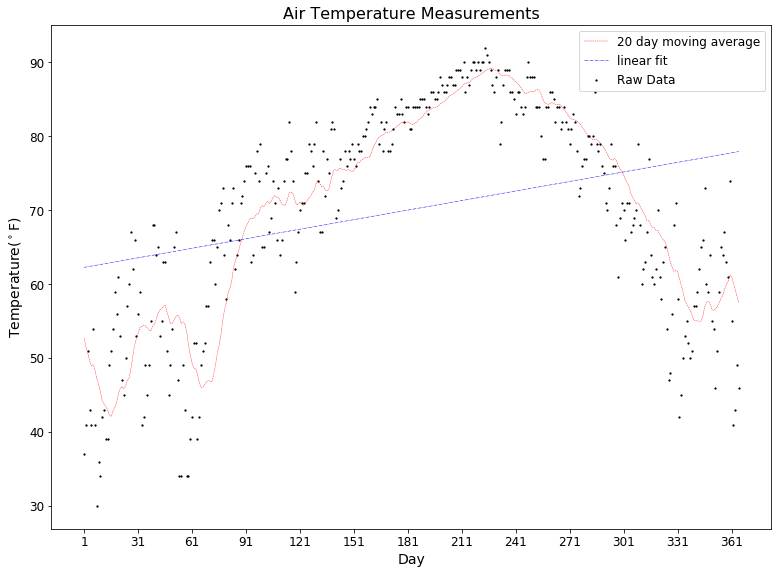

In [186]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([1,1,1,1])
ax.scatter(df_year.day_of_year,df_year.TempAvgF, label='Raw Data',c='k',s=1.5)
ax.plot(df_year.day_of_year, df_year.Moving_Avg, linestyle='--',c='red',linewidth=0.4,label='20 day moving average')
ax.plot(x_pred,y_pred,c='blue',linestyle='-.',linewidth=0.5,label='linear fit')
ax.set_title('Air Temperature Measurements',fontsize=16)
ax.set_xlabel('Day',fontsize=14)
ax.set_ylabel('Temperature($^\circ$F)', fontsize=14)
tick_years= list(range(1,365,30))
ax.set_xticks(tick_years)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12)
plt.show()

#### Activity 3.03: Dummy Variables



In [187]:
dummy_vars = pd.get_dummies(df_year.Month,drop_first=True)
#dummy_vars = dummy_vars.rename(columns ={1: 'Jan',
                                #2: 'Feb',
                                #3: 'Mar',
                                #4: 'Apr',
                                #5: 'May',
                                #6: 'Jun',
                                #7: 'Jul',
                                #8: 'Aug',
                                #9: 'Sep',
                                #10: 'Oct',
                                #11: 'Nov',
                                #12: 'Dec'
                               #})
dummy_vars.columns=['Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dummy_vars

,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
360,0,0,0,0,0,0,0,0,0,0,1
361,0,0,0,0,0,0,0,0,0,0,1
362,0,0,0,0,0,0,0,0,0,0,1
363,0,0,0,0,0,0,0,0,0,0,1


In [188]:
df_year = pd.concat([df_year,dummy_vars],axis=1).reset_index()
df_year.head()

,level_0,index,Date,TempAvgF,Year,Month,Day,Moving_Avg,day_of_year,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,376,2015-01-01,37,2015,1,1,52.70,1,0,0,0,0,0,0,0,0,0,0,0
1,1,377,2015-01-02,41,2015,1,2,51.50,2,0,0,0,0,0,0,0,0,0,0,0
2,2,378,2015-01-03,51,2015,1,3,50.65,3,0,0,0,0,0,0,0,0,0,0,0
3,3,379,2015-01-04,43,2015,1,4,49.65,4,0,0,0,0,0,0,0,0,0,0,0
4,4,380,2015-01-05,41,2015,1,5,48.95,5,0,0,0,0,0,0,0,0,0,0,0


In [189]:
df_year= df_year.drop('level_0',axis=1)
df_year.head()

,index,Date,TempAvgF,Year,Month,Day,Moving_Avg,day_of_year,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,376,2015-01-01,37,2015,1,1,52.70,1,0,0,0,0,0,0,0,0,0,0,0
1,377,2015-01-02,41,2015,1,2,51.50,2,0,0,0,0,0,0,0,0,0,0,0
2,378,2015-01-03,51,2015,1,3,50.65,3,0,0,0,0,0,0,0,0,0,0,0
3,379,2015-01-04,43,2015,1,4,49.65,4,0,0,0,0,0,0,0,0,0,0,0
4,380,2015-01-05,41,2015,1,5,48.95,5,0,0,0,0,0,0,0,0,0,0,0


In [190]:
model = LinearRegression(fit_intercept=True)
model.fit(df_year.loc[:,'day_of_year':'Dec'], df_year.TempAvgF)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [191]:
print('model coefficient', model.coef_)
print('model intercept',model.intercept_)
r2 = model.score(df_year.loc[:,'day_of_year':'Dec'], df_year.TempAvgF)
print('r2',r2)

model coefficient [ 0.03719346  1.57445204  9.35397321 19.16903518 22.02065629 26.80023439
 30.17121033 30.82466482 25.6117698  15.71715435  1.542969   -4.06777548]
model intercept 48.34038858048261
r2 0.7834805472165678


In [193]:
x_pred=df_year.loc[:,'day_of_year']
y_pred = model.predict(df_year.loc[:,'day_of_year':'Dec']) 

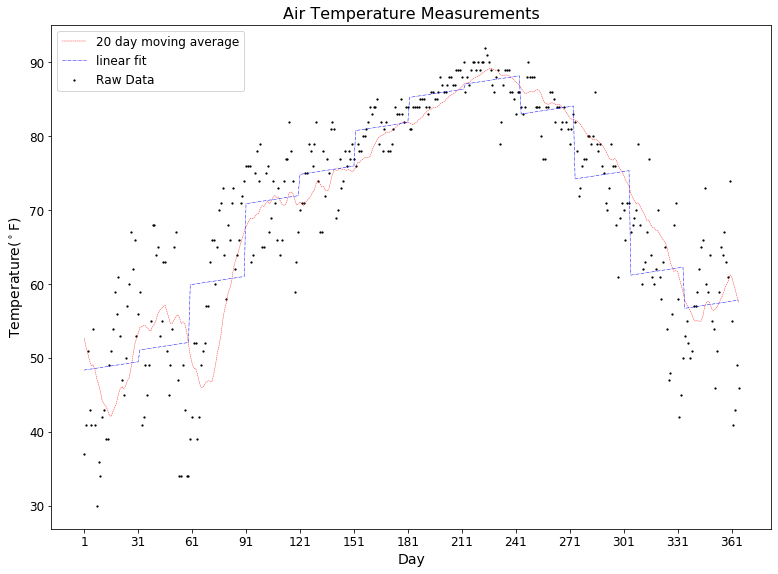

In [195]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([1,1,1,1])
ax.scatter(df_year.day_of_year,df_year.TempAvgF, label='Raw Data',c='k',s=1.5)
ax.plot(df_year.day_of_year, df_year.Moving_Avg, linestyle='--',c='red',linewidth=0.4,label='20 day moving average')
ax.plot(x_pred,y_pred,label='linear fit',c='blue',linestyle='-.',linewidth=0.5)
ax.set_title('Air Temperature Measurements',fontsize=16)
ax.set_xlabel('Day',fontsize=14)
ax.set_ylabel('Temperature($^\circ$F)', fontsize=14)
tick_years= list(range(1,365,30))
ax.set_xticks(tick_years)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12,loc='upper left')
plt.show()

#### Activity 3.04: Feature Engineering with Linear Regression



In [201]:
df_year_sine_cosine = df_year.loc[:,['TempAvgF','day_of_year']]
df_year_sine_cosine

,TempAvgF,day_of_year
0,37,1
1,41,2
2,51,3
3,43,4
4,41,5
...,...,...
360,55,361
361,41,362
362,43,363
363,49,364


In [205]:
df_year_sine_cosine['sine_day_of_year'] = np.sin(2*np.pi*df_year_sine_cosine['day_of_year']/365)
df_year_sine_cosine['cosine_day_of_year']= np.cos(2*np.pi*df_year_sine_cosine['day_of_year']/365)

df_year_sine_cosine.head()

,TempAvgF,day_of_year,sine_day_of_year,cosine_day_of_year
0,37,1,0.017213,0.999852
1,41,2,0.034422,0.999407
2,51,3,0.051620,0.998667
3,43,4,0.068802,0.997630
4,41,5,0.085965,0.996298


In [208]:
model = LinearRegression(fit_intercept=True)
model.fit(df_year_sine_cosine.loc[:,'day_of_year':'cosine_day_of_year'],df_year_sine_cosine.TempAvgF)
print('model coefficient ',model.coef_)
print('model intercept ',model.intercept_)
r2 = model.score(df_year_sine_cosine.loc[:,'day_of_year':'cosine_day_of_year'],df_year_sine_cosine.TempAvgF)
print('r2',r2)

model coefficient  [ 1.46396364e-02 -5.57332499e+00 -1.67824174e+01]
model intercept  67.43327530313064
r2 0.779745650129063


In [209]:
x_pred = df_year_sine_cosine['day_of_year']
y_pred = model.predict(df_year_sine_cosine.loc[:,'day_of_year':'cosine_day_of_year'])


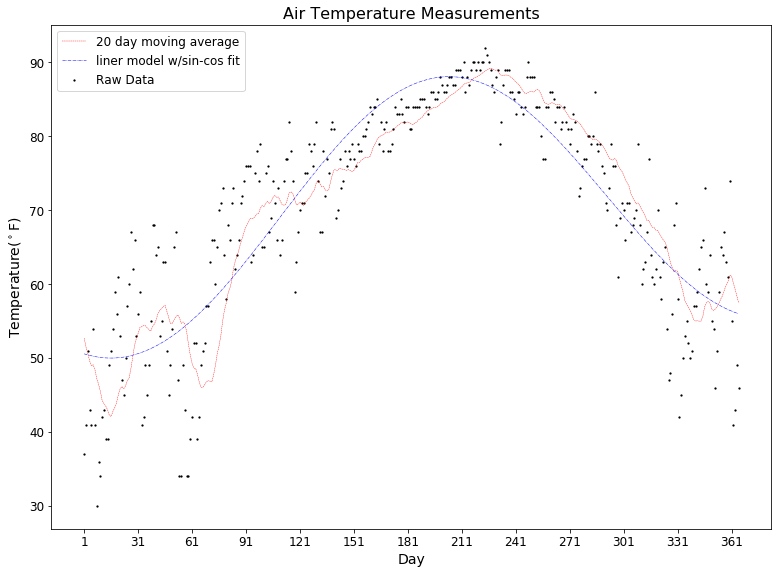

In [210]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([1,1,1,1])
ax.scatter(df_year.day_of_year,df_year.TempAvgF, label='Raw Data',c='k',s=1.5)
ax.plot(df_year.day_of_year, df_year.Moving_Avg, linestyle='--',c='red',linewidth=0.4,label='20 day moving average')
ax.plot(x_pred,y_pred,label='liner model w/sin-cos fit',c='blue',linestyle='-.',linewidth=0.5)
ax.set_title('Air Temperature Measurements',fontsize=16)
ax.set_xlabel('Day',fontsize=14)
ax.set_ylabel('Temperature($^\circ$F)', fontsize=14)
tick_years= list(range(1,365,30))
ax.set_xticks(tick_years)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12,loc='upper left')
plt.show()

#### Activity 3.05: Gradient Descent



In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor

In [212]:
!ls 

Activities.ipynb                     combined_cycle_power_plant-Copy1.csv
Exercises-Chapter-3.ipynb            synth_temp-Copy1.csv
austin_weather-Copy1.csv


In [213]:
austin_data = df_year.loc[:,['TempAvgF','day_of_year']]
austin_data

,TempAvgF,day_of_year
0,37,1
1,41,2
2,51,3
3,43,4
4,41,5
...,...,...
360,55,361
361,41,362
362,43,363
363,49,364


In [223]:
y_min = austin_data.TempAvgF.min()
y_range = austin_data.TempAvgF.max()-y_min

In [224]:
x_min =1 
x_range = 365-1

In [225]:
scale_x = (austin_data.day_of_year- x_min)/x_range
scale_y = (austin_data.TempAvgF - y_min)/y_range

In [244]:
np.random.seed(42)
model = SGDRegressor(loss = 'squared_loss',
    max_iter = 100,
    learning_rate = 'constant',
    eta0 = 0.0005,
    tol = 0.00009,
    penalty = 'none')
model.fit(scale_x.values.reshape((-1,1)),scale_y)
print(model.coef_)
print(model.intercept_)

[0.26616639]
[0.50807192]


In [222]:
#if the data was unscaled
#theta0 = model.intercept_
#theta1 = model.coef_
#since data is scaled between 0 to 1, 
#it is necessary to scale back the theta values as well.


In [245]:
theta0 = (y_min + y_range * model.intercept_ - 
        y_range * model.coef_ * x_min / x_range)
theta1 = y_range * model.coef_ / x_range
print(f'theta0 {theta0} \ntheta1 {theta1}')

theta0 [61.45512325] 
theta1 [0.04533603]


In [246]:
y_pred = model.predict(scale_x.values.reshape((-1,1)))
y_pred = (y_pred*y_range)+y_min
r2 = model.score(scale_x.values.reshape((-1,1)),scale_y)
print(r2)

0.09462157379706759


In [247]:
x_pred = austin_data.day_of_year

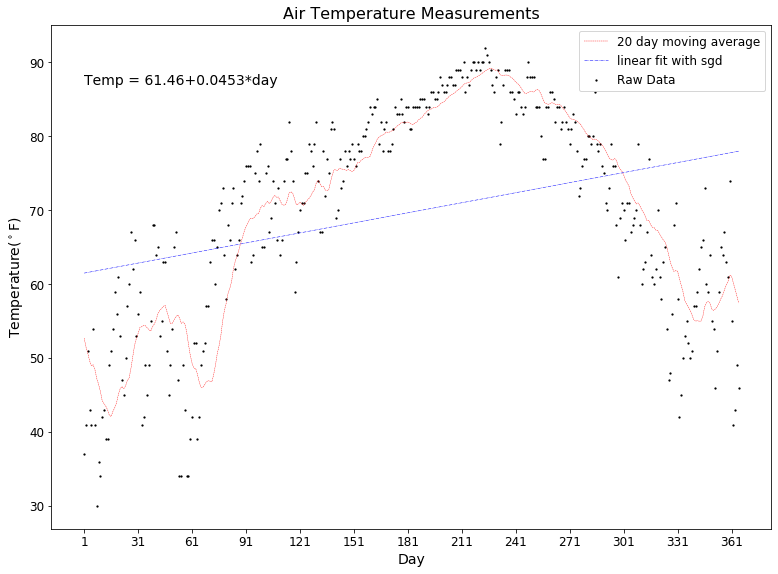

In [254]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([1,1,1,1])
ax.scatter(df_year.day_of_year,df_year.TempAvgF, label='Raw Data',c='k',s=1.5)
ax.plot(df_year.day_of_year, df_year.Moving_Avg, linestyle='--',c='red',linewidth=0.4,label='20 day moving average')
ax.plot(x_pred,y_pred,label='linear fit with sgd',c='blue',linestyle='-.',linewidth=0.5)
ax.set_title('Air Temperature Measurements',fontsize=16)
ax.set_xlabel('Day',fontsize=14)
ax.set_ylabel('Temperature($^\circ$F)', fontsize=14)
tick_years= list(range(1,365,30))
ax.set_xticks(tick_years)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12,loc='upper right')
ax.text(1,87,'Temp = '+str(round(theta0[0], 2))+'+'+str(round(theta1[0], 4))+'*day', fontsize=14) 
plt.show()